# Income Predictor


In this project, We will use Machine Learning algorithms on Census Income dataset and classify individuals between having income salary less than or equal to 50K and more than 50K.

# Importing Libraries and Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
# US Income data set path
income_path = "Resources/income.csv"

# Import the data into a Pandas DataFrame
df = pd.read_csv(income_path)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
columns = ['Age',
           'Employer_Type',
           'fnlgwt',
           'Education',
           'Ed_Numeric',
           'Marital_Status',
           'Occupation',
           'Relationship',
           'Race',
           'Sex',
           'Capital_Gain',
           'Capital_Loss',
           'Hours_per_Week',
           'Country',
           'Income_Above_Below_50K']
df=pd.read_csv(income_path, names=columns)
df.head(10)

,Age,Employer_Type,fnlgwt,Education,Ed_Numeric,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income_Above_Below_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                       32561 non-null int64
Employer_Type             32561 non-null object
fnlgwt                    32561 non-null int64
Education                 32561 non-null object
Ed_Numeric                32561 non-null int64
Marital_Status            32561 non-null object
Occupation                32561 non-null object
Relationship              32561 non-null object
Race                      32561 non-null object
Sex                       32561 non-null object
Capital_Gain              32561 non-null int64
Capital_Loss              32561 non-null int64
Hours_per_Week            32561 non-null int64
Country                   32561 non-null object
Income_Above_Below_50K    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Wrangling

In [5]:
# Check for null values
print ("\nNull Values :  ", df.isnull().sum().values.sum())


Null Values :   0


In [6]:
# Check for " ?" values
df_missing = (df==' ?').sum()
df_missing

Age                          0
Employer_Type             1836
fnlgwt                       0
Education                    0
Ed_Numeric                   0
Marital_Status               0
Occupation                1843
Relationship                 0
Race                         0
Sex                          0
Capital_Gain                 0
Capital_Loss                 0
Hours_per_Week               0
Country                    583
Income_Above_Below_50K       0
dtype: int64

In [7]:
# Remove rows which have invalid data from data frame
df = df[(df.astype(str) != ' ?').all(axis=1)]

# Make sure that the rows were dropped. There were 32561 rows before.
len(df)

30162

In [8]:
# Create a new column for income which is binary
df['Income_Above/Below_50K'] = df.apply(lambda row: 
                                        1 if '>50K' in row['Income_Above_Below_50K'] 
                                        else 0, axis=1)

In [9]:
# Remove unwanted columns
df = df.drop(['Income_Above_Below_50K',
              'fnlgwt',
              'Ed_Numeric',
              'Capital_Gain',
              'Capital_Loss'], axis=1)
df.head(10)

,Age,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Country,Income_Above/Below_50K
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


# Exploratory Data Analysis and Data Processing


## Income_Above/Below_50K

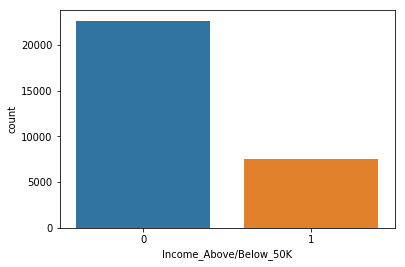

In [10]:
# salary

sns.countplot(df['Income_Above/Below_50K'])

## Country

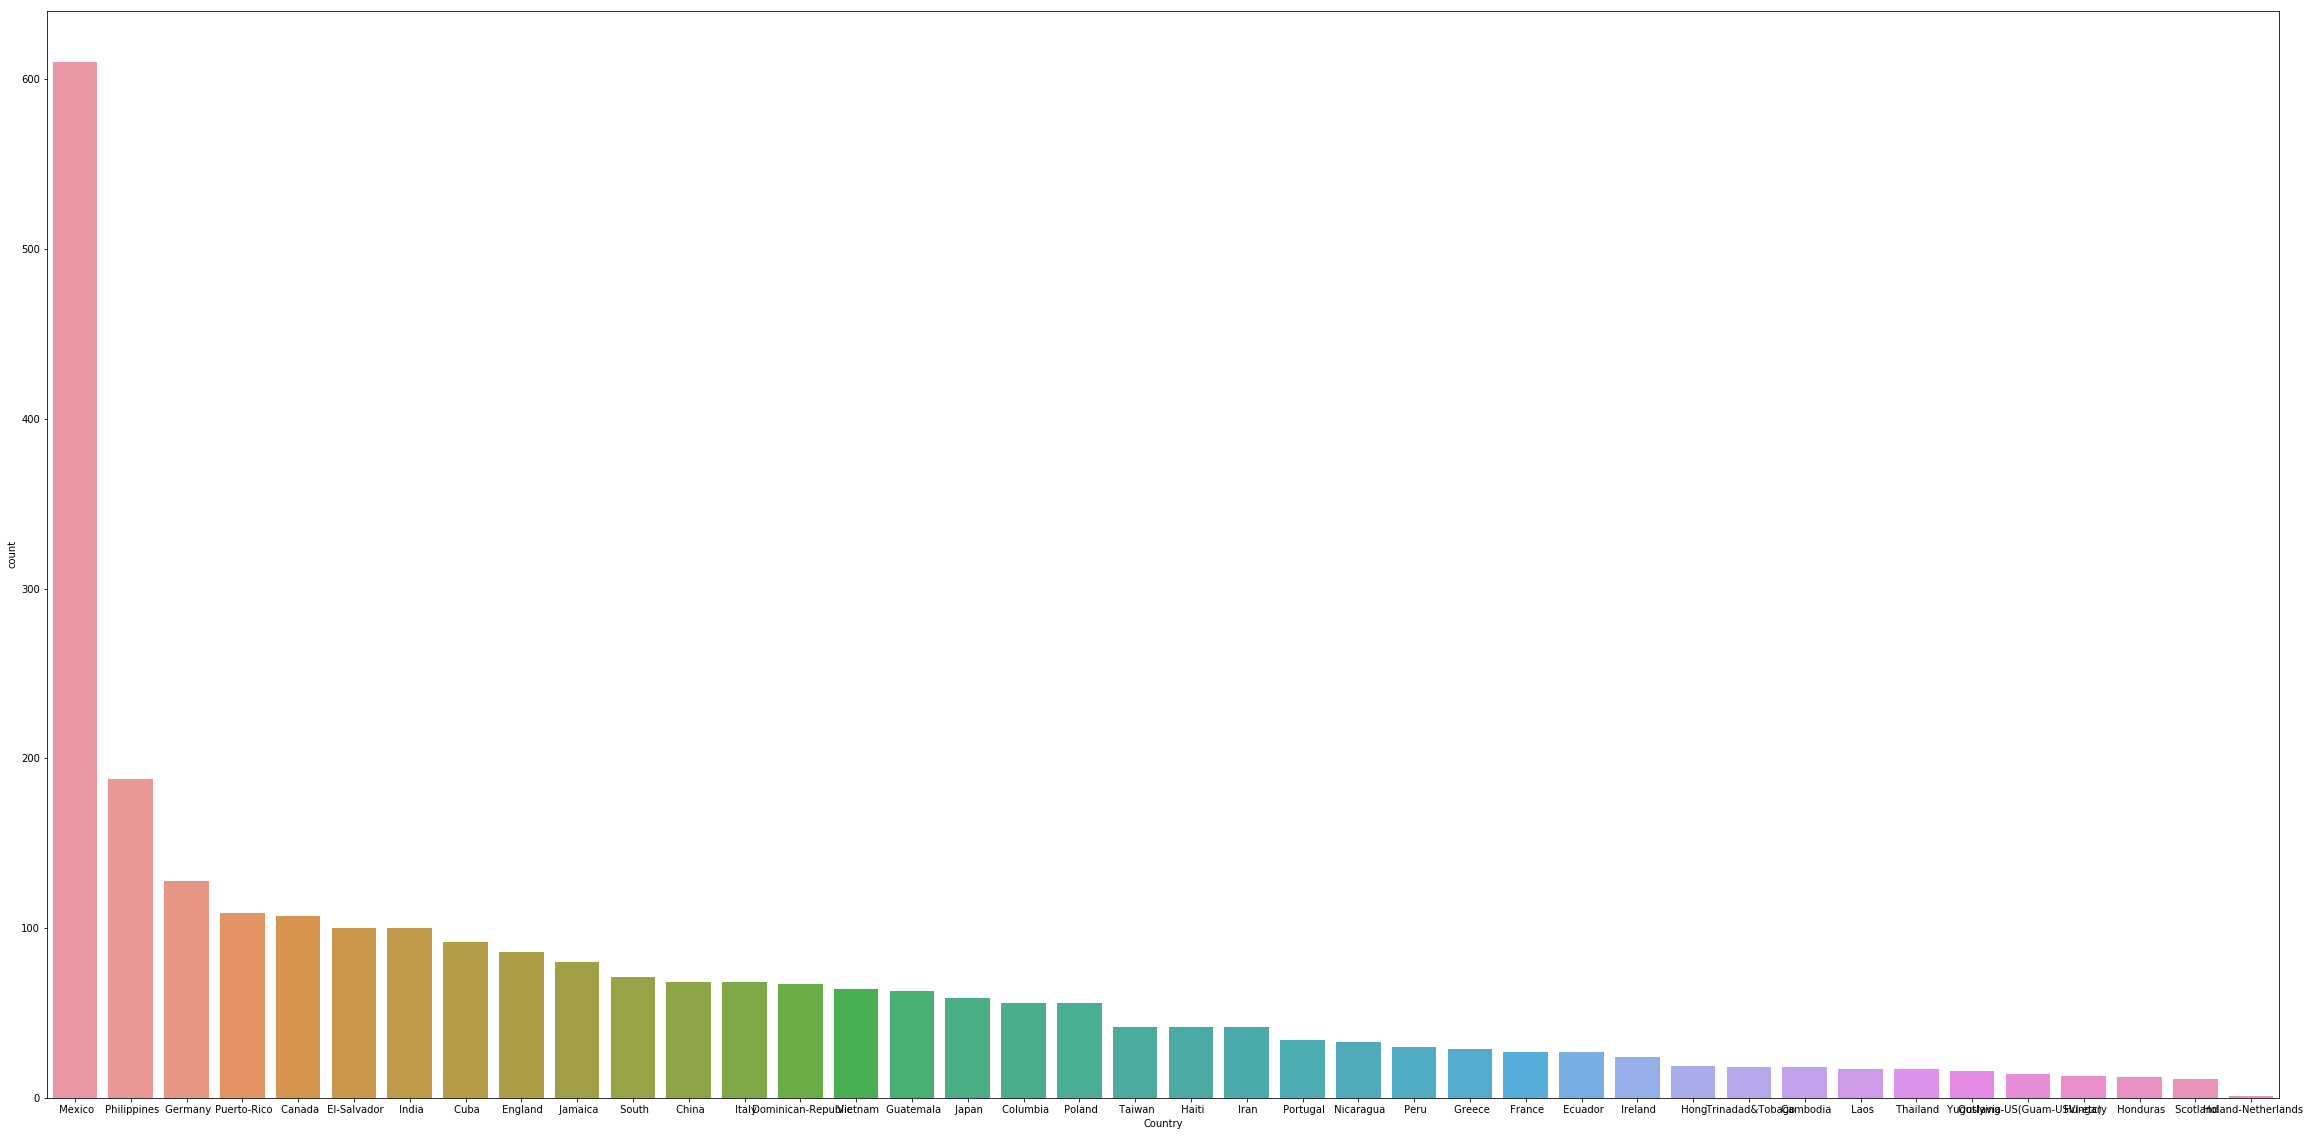

In [11]:
#Country

f, ax = plt.subplots(figsize=(40, 20))
temp=df[~df['Country'].isin([df['Country'][0]])]
result = temp.groupby(["Country"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)


sns.countplot(x='Country',data=temp,order=result['Country'])

## Occupation

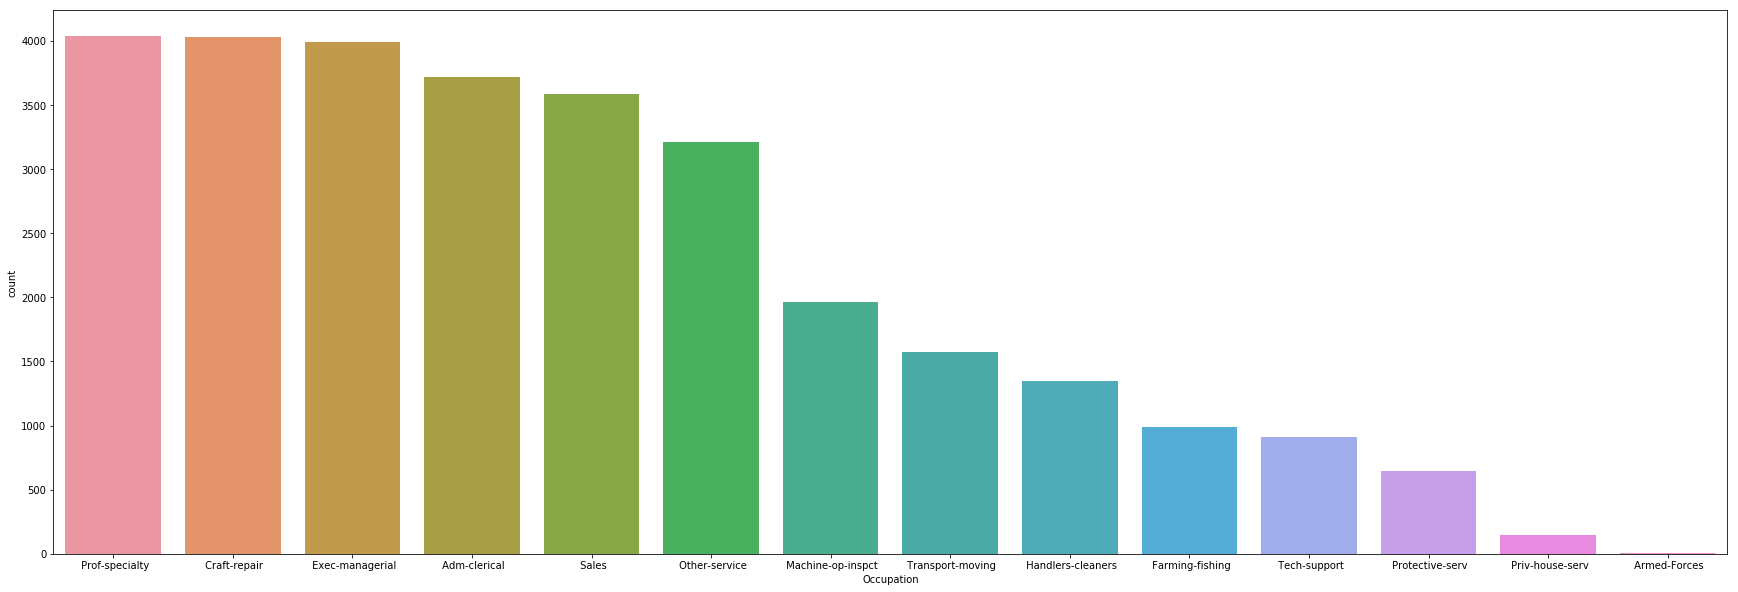

In [12]:
#Occupation
result = df.groupby(["Occupation"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(df['Occupation'],order=result['Occupation'])

## Age

Here, bucket the age into separate bins.

0-25: Young
25-50: Adult
50-100: Old

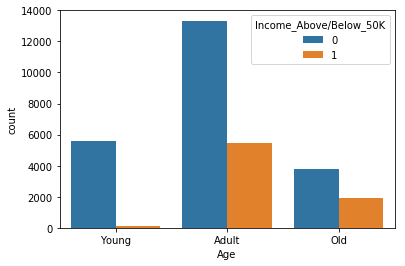

In [13]:

df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'Age', hue = 'Income_Above/Below_50K', data = df)

## Race

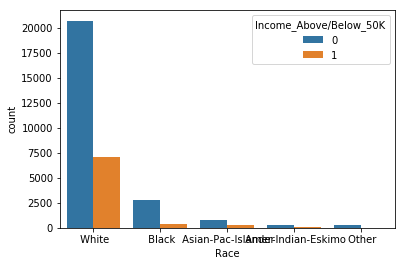

In [10]:

sns.countplot(x = 'Race', hue = 'Income_Above/Below_50K', data = df)

## Employer_Type

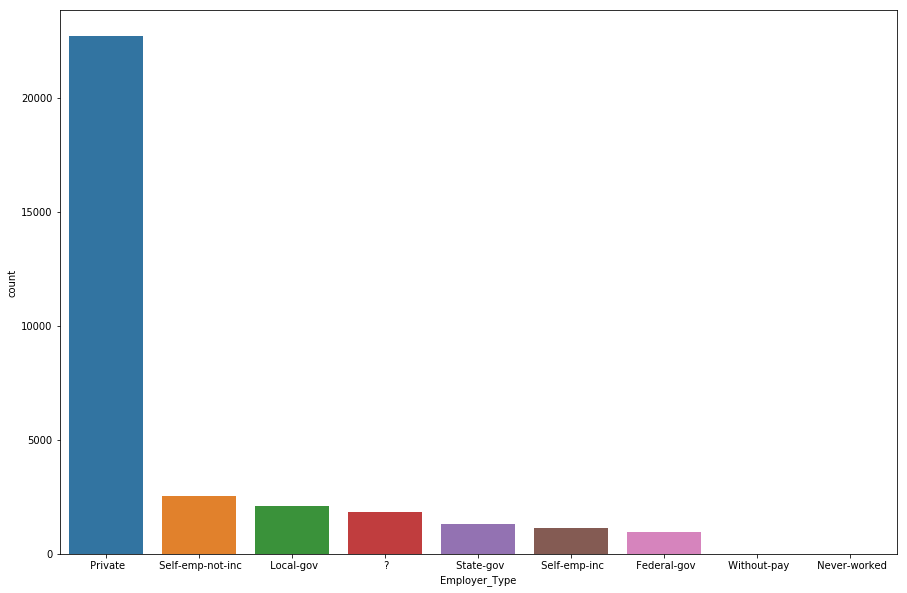

In [11]:
result = df.groupby(["Employer_Type"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(df['Employer_Type'],order=result['Employer_Type'])

## Education

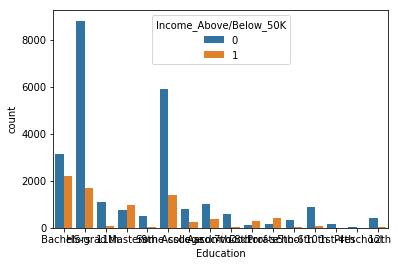

In [12]:
sns.countplot(x = 'Education', hue = 'Income_Above/Below_50K', data = df)

## Sex

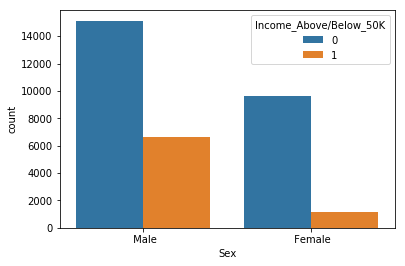

In [14]:

sns.countplot(x = 'Sex', hue = 'Income_Above/Below_50K', data = df)

# Encoding Categorical Variables

In [15]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [16]:
# encode categorical variables using label Encoder
# apply label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Country
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39
3,4,1,2,6,0,2,1,39
4,4,9,2,10,5,2,0,5


In [17]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,Age,Hours_per_Week,Income_Above/Below_50K,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Country
0,39,40,0,7,9,4,1,1,4,1,39
1,50,13,0,6,9,2,4,0,4,1,39
2,38,40,0,4,11,0,6,1,4,1,39
3,53,40,0,4,1,2,6,0,2,1,39
4,28,40,0,4,9,2,10,5,2,0,5


In [18]:
# look at column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
Age                       32561 non-null int64
Hours_per_Week            32561 non-null int64
Income_Above/Below_50K    32561 non-null int64
Employer_Type             32561 non-null int32
Education                 32561 non-null int32
Marital_Status            32561 non-null int32
Occupation                32561 non-null int32
Relationship              32561 non-null int32
Race                      32561 non-null int32
Sex                       32561 non-null int32
Country                   32561 non-null int32
dtypes: int32(8), int64(3)
memory usage: 1.7 MB


# Train and Test Data

In [33]:
X = df.drop(['Income_Above/Below_50K'], axis = 1)
y = df['Income_Above/Below_50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Appyting Machine Learning
The following algorithms are applied:Logistic Regression, KNN, Desission Tree

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions= logreg.predict(X_test)

In [75]:
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      7407
           1       0.46      0.12      0.19      2362

   micro avg       0.75      0.75      0.75      9769
   macro avg       0.62      0.54      0.52      9769
weighted avg       0.70      0.75      0.69      9769



In [76]:
#confusion_matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))

[[7064  343]
 [2070  292]]


In [83]:
#accuracy_score
from sklearn.metrics import accuracy_score

print('Logistic Regression accuracy score is: {0:0.4f}'. format(accuracy_score(y_test,predictions )))

Logistic Regression accuracy score is: 0.7530
